In [3]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 7

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

import elhers_indicators as ei

In [5]:
# Load data, specifically AAPL minute OHLC data from 2015-07-14
data = pd.read_csv('https://drive.google.com/uc?export=download&id=0B9-kA56h5JCMU2w4d3JmN1hWZW8',
                 index_col=0, parse_dates=True)
time = data.index              # Useful for plotting.
price = data.CLOSE.as_matrix() #(0.5 * (data.HIGH + data.LOW)).as_matrix() 

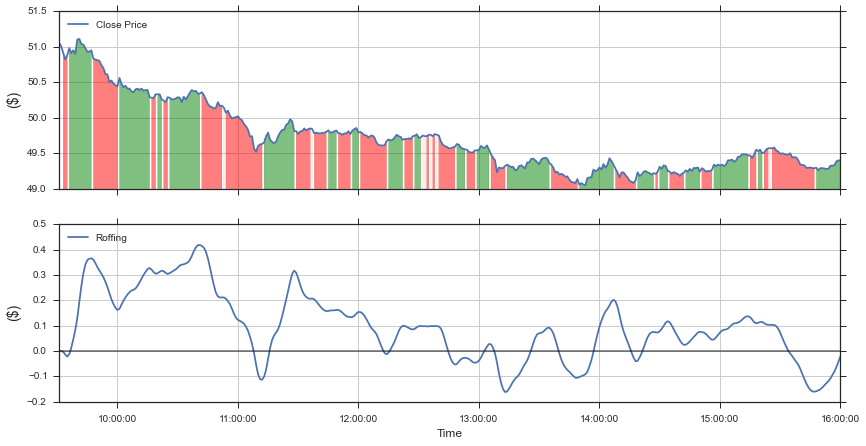

In [6]:
rof = ei.roofing_indicator(price, 15, 180)
diff_rof = np.zeros(len(rof))
diff_rof[1:] = np.diff(rof)

min_price = int(np.min(price))

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(time, price, label='Close Price')
ax[0].set_ylabel('($)', fontsize=14)
ax[0].fill_between(time, min_price, price, where=diff_rof>0,color='green', alpha=0.5)
ax[0].fill_between(time, min_price, price, where=diff_rof<0,color='red', alpha=0.5)
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].plot(time, rof, label='Roffing')
ax[1].set_ylabel('($)', fontsize=14)
ax[1].set_xlabel('Time', fontsize=12)
ax[1].axhline(y=0, color='black', alpha=0.5)
ax[1].legend(loc='upper left')
ax[1].grid()

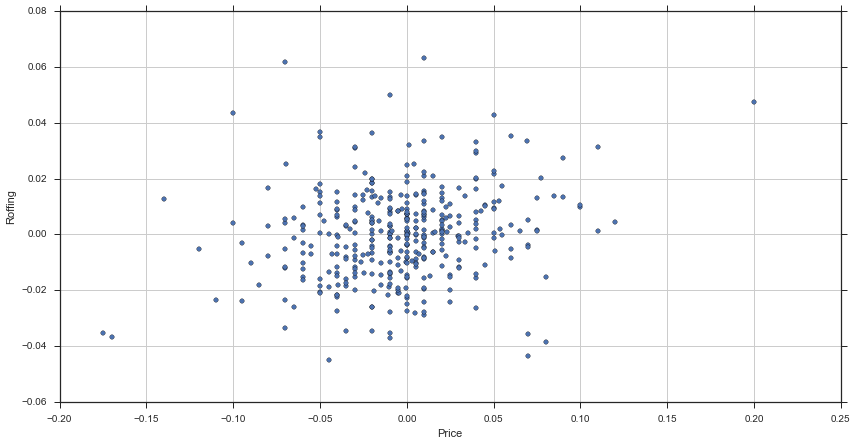

In [7]:
df = pd.DataFrame(np.transpose(np.vstack((np.diff(price), np.diff(rof)))),
                  columns=['Price', 'Roffing'])
df.plot(kind='scatter', x='Price', y='Roffing', grid=True)